<a href="https://colab.research.google.com/github/SaurabhSRP/3-Mobile-Price-Classification/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
##Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)




In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/Mobile-Price-Classification/main/train.csv")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


battery_power Total energy a battery can store in one time measured in mAh

blue Has bluetooth or not

clock_speed speed at which microprocessor executes instructions

dual_sim Has dual sim support or not

fc Front Camera mega pixels

four_g Has 4G or not

int_memory Internal Memory in Gigabytes

m_dep Mobile Depth in cm

mobile_wt Weight of mobile phone

n_cores Number of cores of processor

pc Primary Camera mega pixels

px_height Pixel Resolution Height

px_width Pixel Resolution Width

ram Random Access Memory in Mega Bytes

sc_h Screen Height of mobile in cm

sc_w Screen Width of mobile in cm

talk_time longest time that a single battery charge will last when you are

three_g Has 3G or not

touch_screen Has touch screen or not

wifi Has wifi or not

In [3]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### We have many categorical data that has been encoded,we will perform EDA on each category (i.e Numerical & Categorical data)  carefully by extracting them

In [6]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [7]:
df_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

###This is a perfectly balanced dataset, something every Data scientist looks for 🔥

# **EDA**

In [8]:
categorical_feature=['blue','dual_sim','four_g','three_g','touch_screen','wifi']

In [9]:
df_train[categorical_feature].head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0


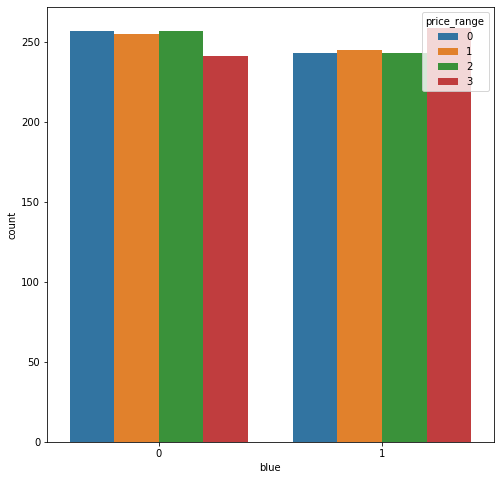

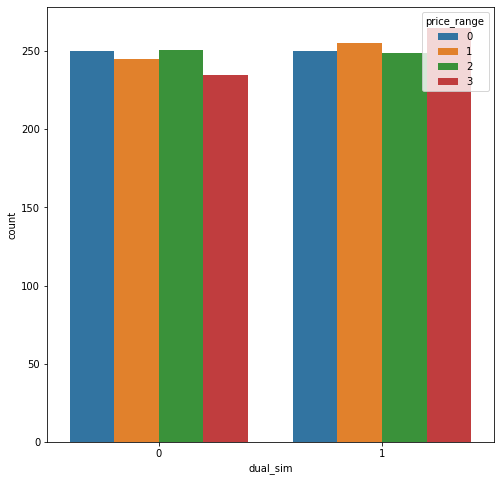

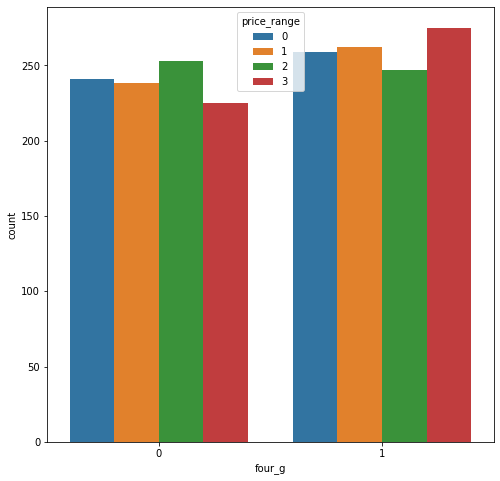

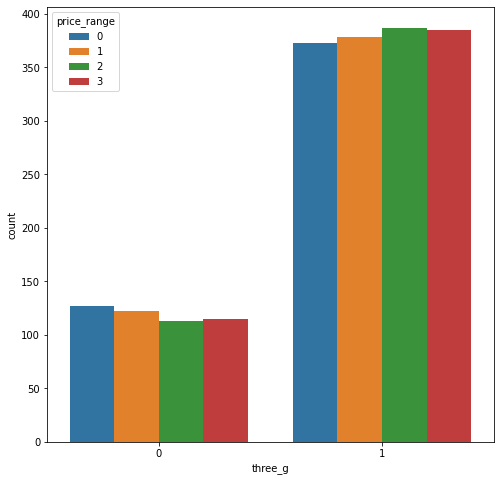

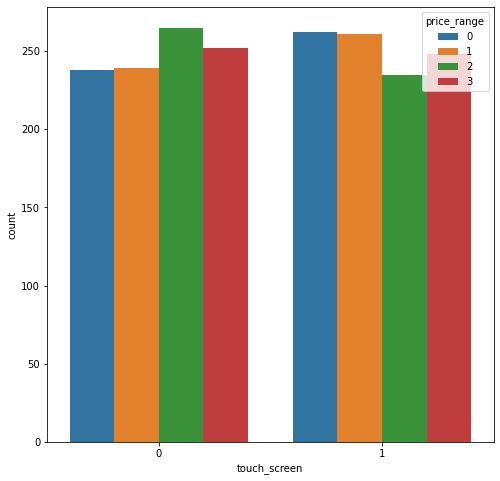

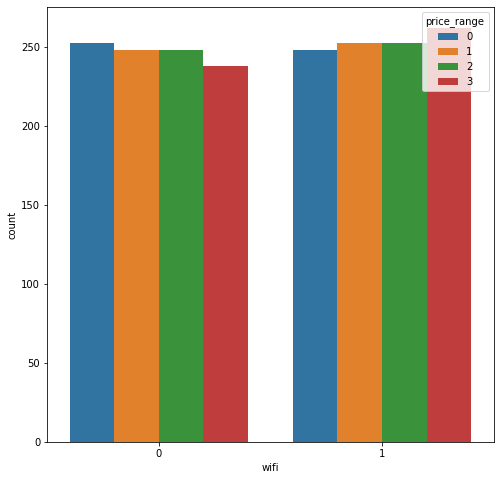

In [10]:
for feature in categorical_feature:
  plt.figure(figsize=(8,8))
  sns.countplot(x=df_train[feature],hue='price_range',data=df_train)

Observation:

The data in this is very misleading and can invoke lot of questions and doubt regarding the sanity of the data, but as we are practising it is fine.

1) Many costly phones dont support 3G 

2) Many phones even though they are costly there is no touch screen

3) Many of the phones even though costly dont support wifi 

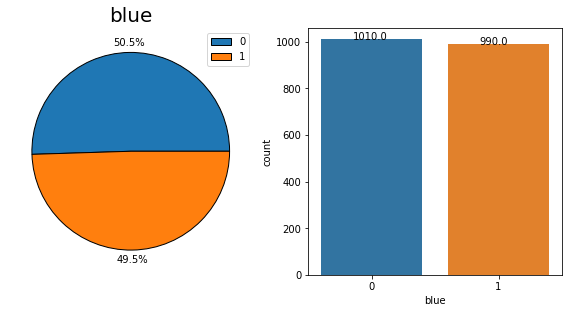

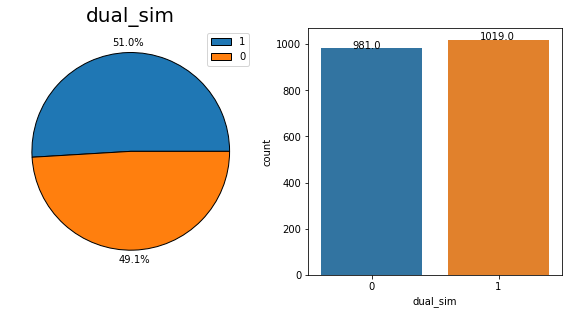

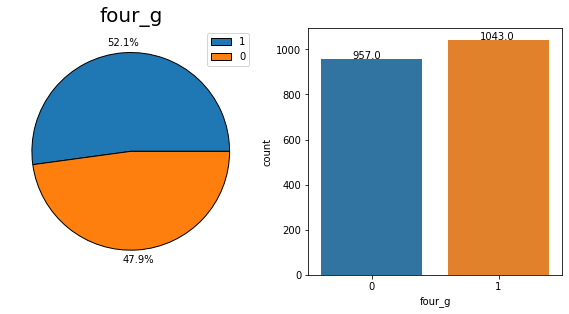

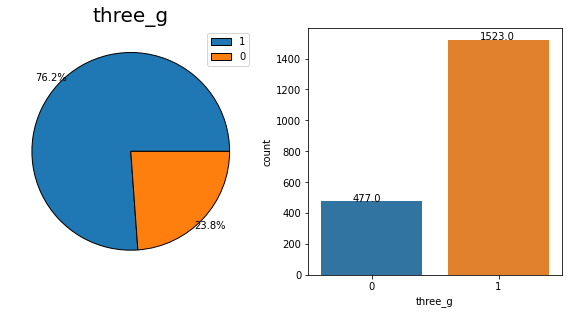

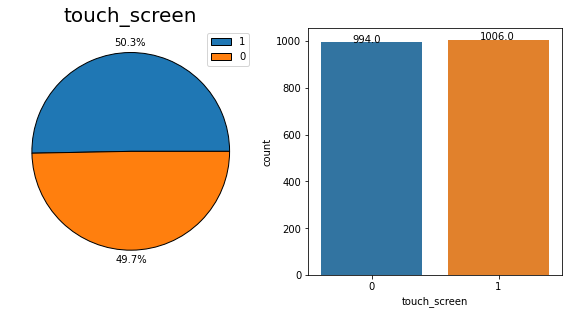

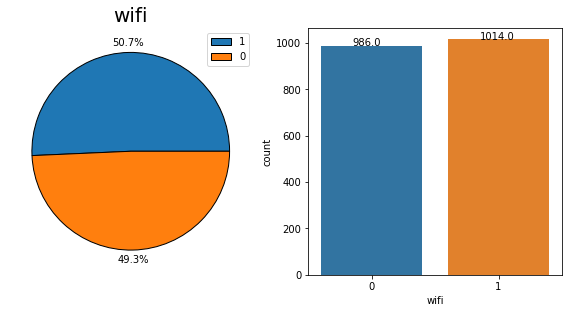

In [11]:
for feature in categorical_feature:
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  plt.pie(x=df_train[feature].value_counts(),autopct='%1.1f%%',pctdistance=1.1,
          wedgeprops={'linewidth':1.0,'edgecolor':'black'},
          textprops={'color':'black','fontsize':10},
          )
  plt.legend(labels=df_train[feature].value_counts().index)
  plt.title(feature,fontsize=20)

  plt.subplot(2,2,2)
  ax=sns.countplot(x=df_train[feature])
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [12]:
numerical_feature=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

In [13]:
df_train[numerical_feature].head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

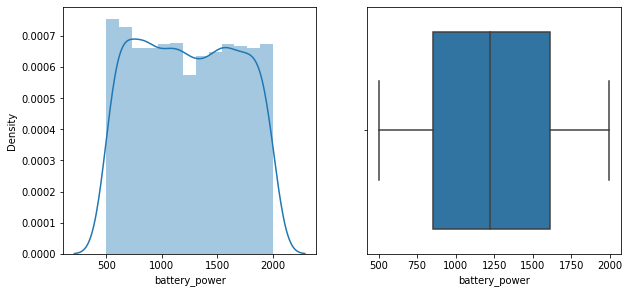

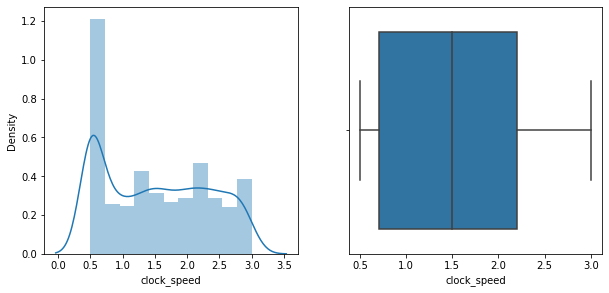

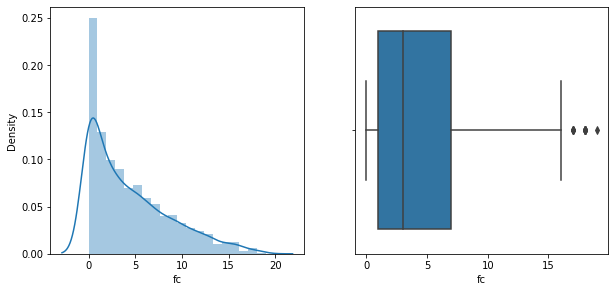

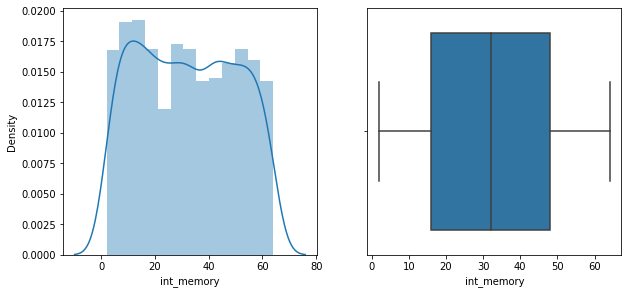

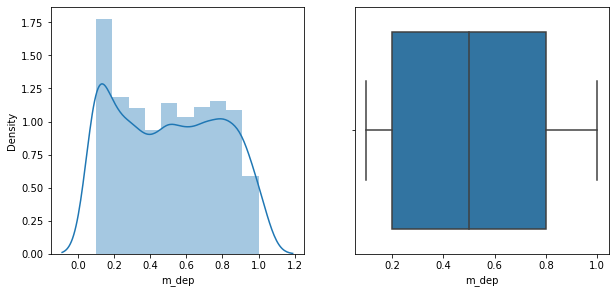

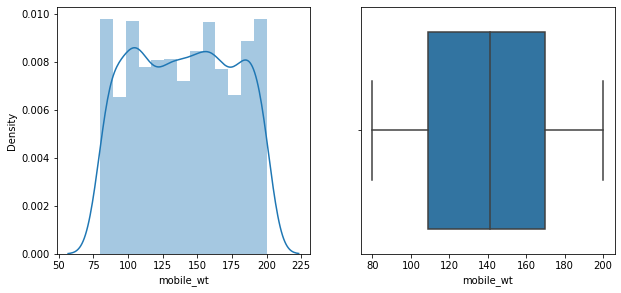

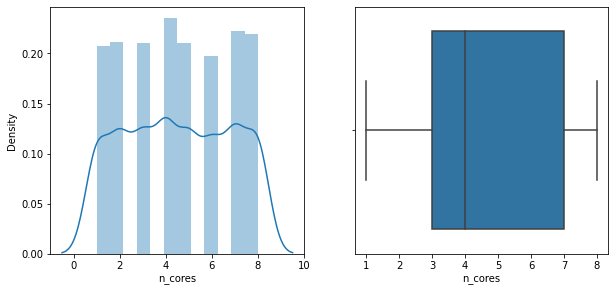

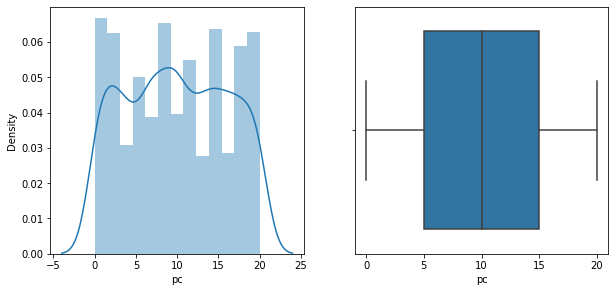

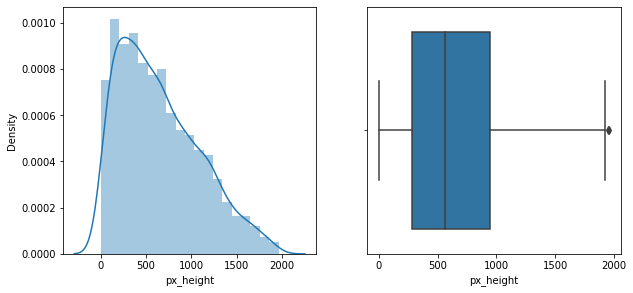

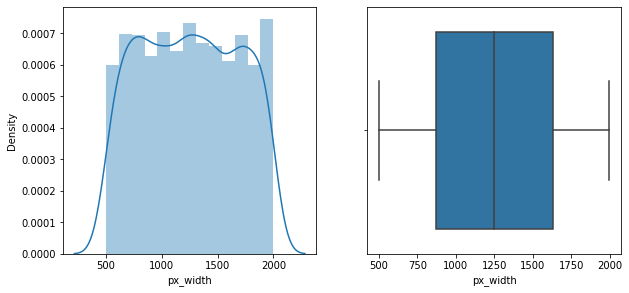

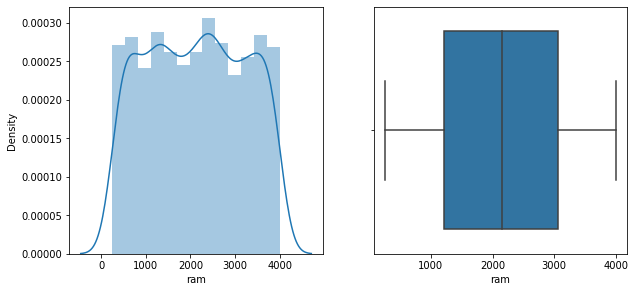

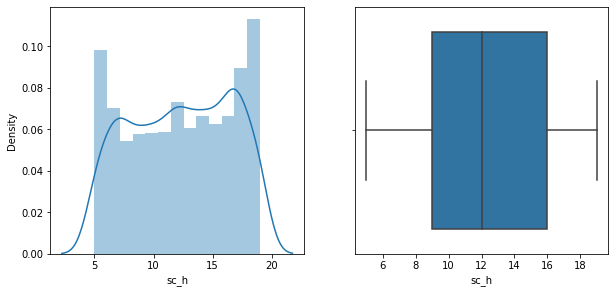

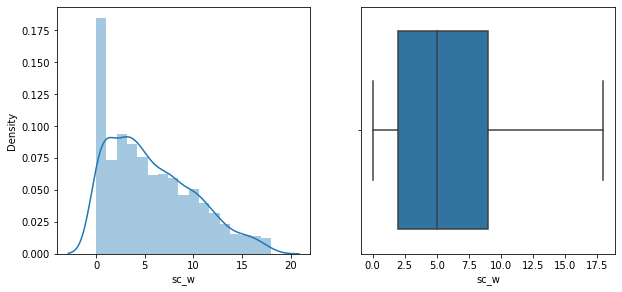

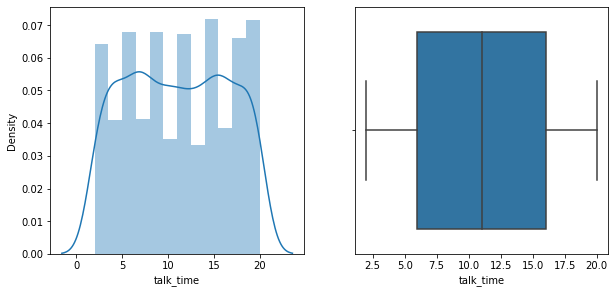

In [14]:
for feature in numerical_feature:
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  sns.distplot(df_train[feature])

  plt.subplot(2,2,2)
  sns.boxplot(df_train[feature])

In [15]:
price_range_0=df_train[df_train['price_range']==0]
price_range_1=df_train[df_train['price_range']==1]
price_range_2=df_train[df_train['price_range']==2]
price_range_3=df_train[df_train['price_range']==3]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

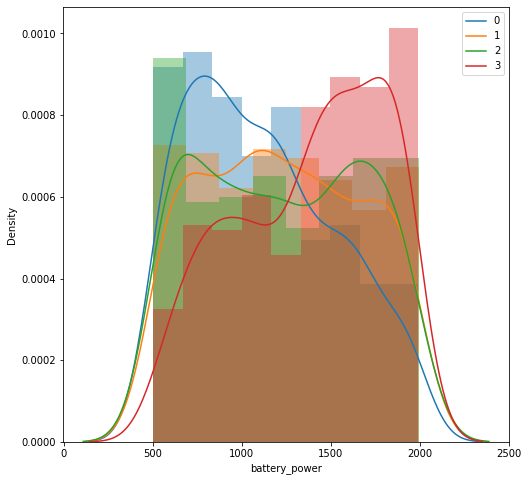

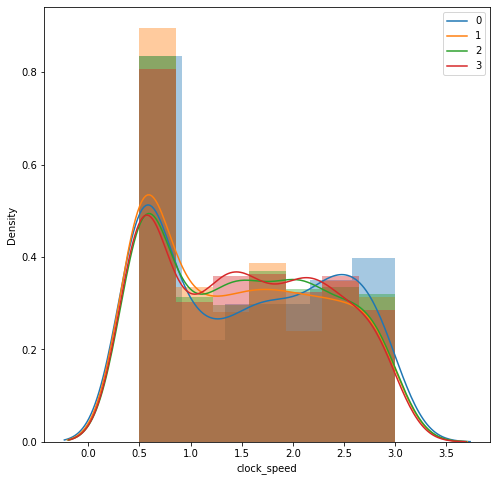

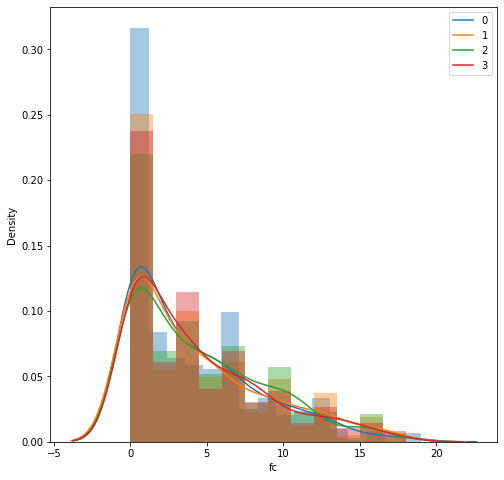

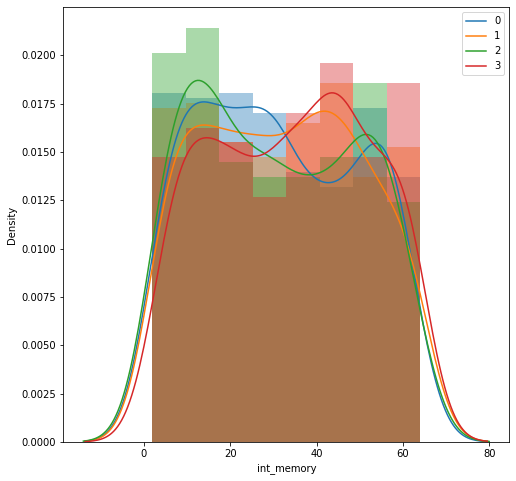

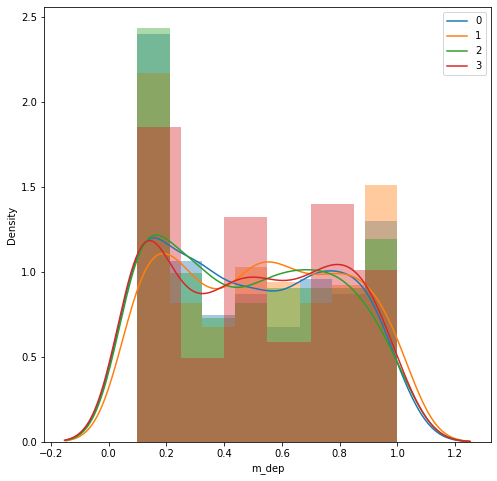

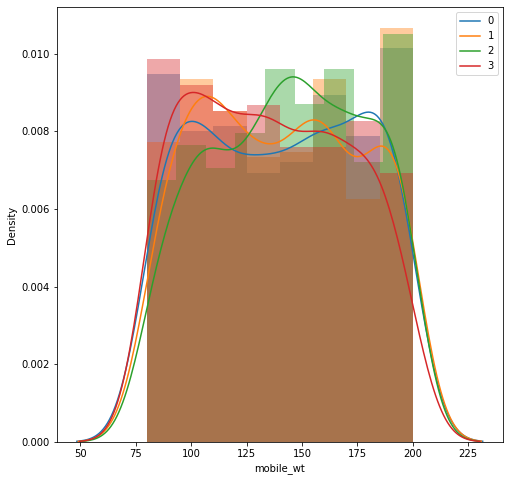

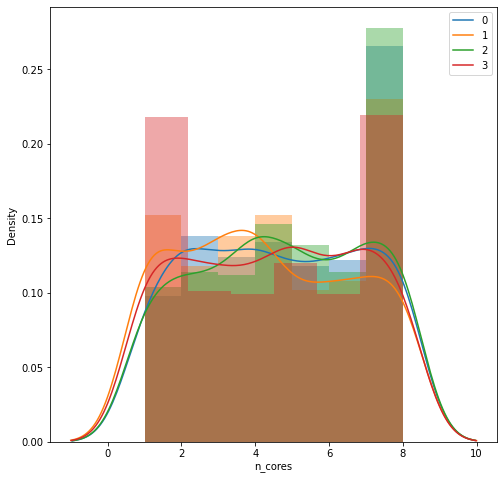

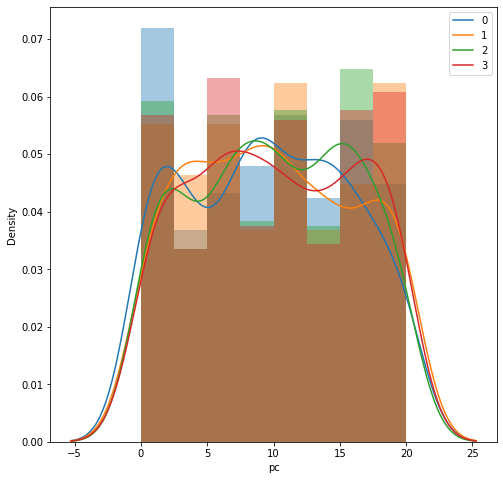

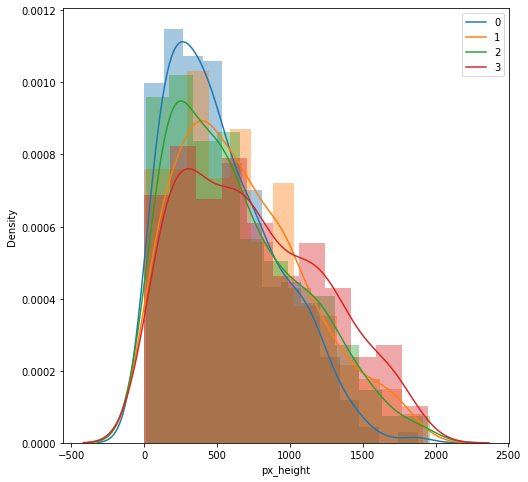

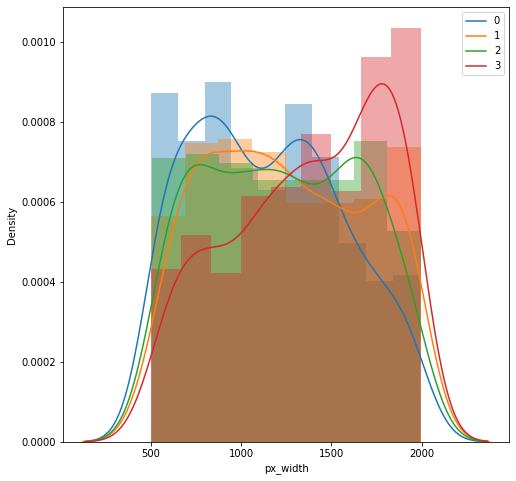

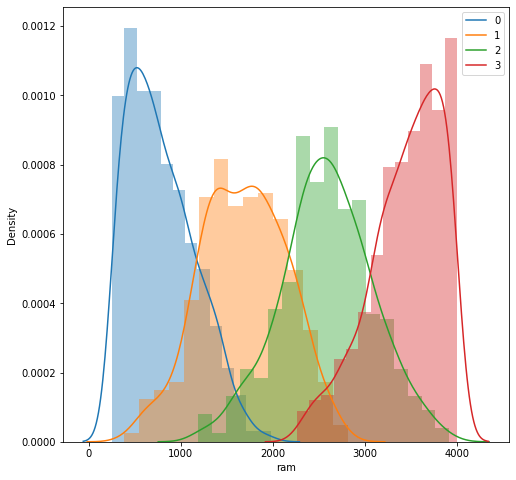

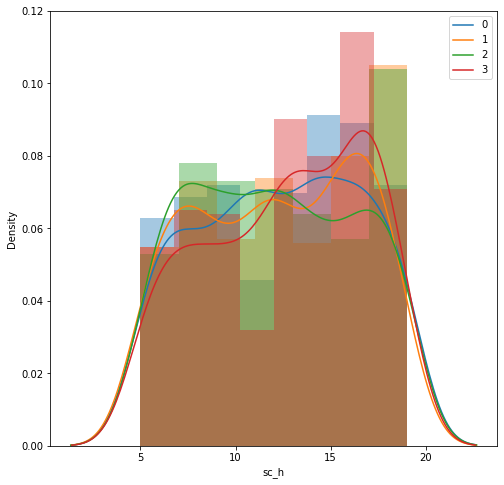

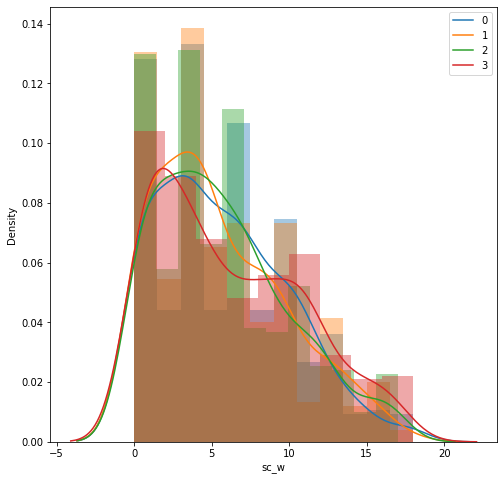

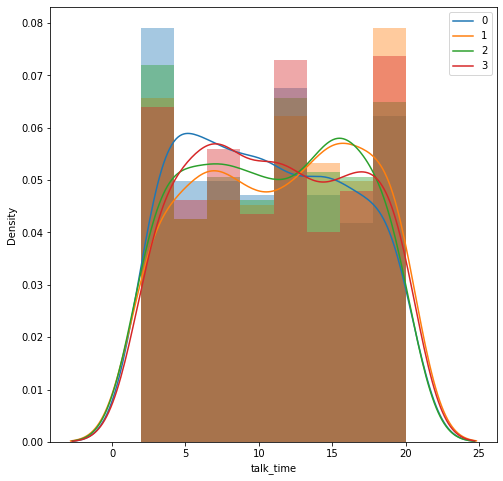

In [16]:
for feature in numerical_feature:
  plt.figure(figsize=(8,8))
  sns.distplot(price_range_0[feature])
  sns.distplot(price_range_1[feature])
  sns.distplot(price_range_2[feature])
  sns.distplot(price_range_3[feature])
  plt.legend(labels=['0','1','2','3'])

Observations:

 1) the data is not very right in terms of price range , as most of the feature follow the same trend

 2) Ideally we should be getting trends similar to feature 'RAM'

 3) Data is wrong at multiple places such as 'fc' = 0 , even for phones which are in price range 3 , 'pc' = 0 , even moderate and highly costly phones dont have primary camera at all 🤥

 4)sc_w=0 , how is this possible 

#**Scale the Train data**

###**before scaling we will define our independent and dependent features**

In [17]:
X=df_train.drop('price_range',axis=1)
y=df_train['price_range']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

scaled_X_train=pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)

In [20]:
print(scaled_X_train.shape)
print(scaled_X_test.shape)

(1600, 20)
(400, 20)


#**KNN alogrithm for scaled data**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier()

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
model_param={'n_neighbors':np.arange(1,300)}

In [25]:
clf=RandomizedSearchCV(knnmodel,model_param,n_iter=100,cv=5,random_state=1)

In [26]:
model=clf.fit(scaled_X_train,y_train)

In [27]:
from pprint import pprint 
pprint(model.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 297,
 'p': 2,
 'weights': 'uniform'}


In [28]:
prediction=model.predict(scaled_X_test)

In [29]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[79 12  1  0]
 [40 33 24  0]
 [ 8 33 51 17]
 [ 0  0 29 73]]
0.59
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        92
           1       0.42      0.34      0.38        97
           2       0.49      0.47      0.48       109
           3       0.81      0.72      0.76       102

    accuracy                           0.59       400
   macro avg       0.59      0.60      0.58       400
weighted avg       0.58      0.59      0.58       400



#**KNN alogrithm for non-scaled data**

In [30]:
model2=clf.fit(X_train,y_train)

In [31]:
from pprint import pprint 
pprint(model.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}


In [32]:
pred=model.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[89  3  0  0]
 [ 6 90  1  0]
 [ 0  6 96  7]
 [ 0  0  9 93]]
0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        92
           1       0.91      0.93      0.92        97
           2       0.91      0.88      0.89       109
           3       0.93      0.91      0.92       102

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



#**Decision Tree for Scaled data**

In [35]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()

In [36]:
treemodel.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [37]:
pred_dectree=treemodel.predict(scaled_X_test)

In [38]:
print(confusion_matrix(y_test,pred_dectree))
print(accuracy_score(y_test,pred_dectree))
print(classification_report(y_test,pred_dectree))

[[85  7  0  0]
 [ 6 81 10  0]
 [ 0 21 77 11]
 [ 0  0  9 93]]
0.84
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        92
           1       0.74      0.84      0.79        97
           2       0.80      0.71      0.75       109
           3       0.89      0.91      0.90       102

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



#**Decision Tree for non Scaled data**

In [39]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
pred2_dectree=treemodel.predict(X_test)

In [42]:
print(confusion_matrix(y_test,pred2_dectree))
print(accuracy_score(y_test,pred2_dectree))
print(classification_report(y_test,pred2_dectree))

[[84  8  0  0]
 [ 7 83  7  0]
 [ 0 17 83  9]
 [ 0  0 10 92]]
0.855
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        92
           1       0.77      0.86      0.81        97
           2       0.83      0.76      0.79       109
           3       0.91      0.90      0.91       102

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.85      0.86       400



#**SVC for scaled data**

In [43]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')


In [44]:
classifier.fit(scaled_X_train,y_train)

SVC()

In [45]:
pre_SVC=classifier.predict(scaled_X_test)

In [46]:
print(confusion_matrix(y_test,pre_SVC))
print(accuracy_score(y_test,pre_SVC))
print(classification_report(y_test,pre_SVC))

[[84  8  0  0]
 [ 6 82  9  0]
 [ 0 15 87  7]
 [ 0  0 11 91]]
0.86
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        92
           1       0.78      0.85      0.81        97
           2       0.81      0.80      0.81       109
           3       0.93      0.89      0.91       102

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



#**SVC for non scaled data**

In [47]:
classifier.fit(X_train,y_train)

SVC()

In [49]:
pre1_SVC=classifier.predict(X_test)

In [50]:
print(confusion_matrix(y_test,pre1_SVC))
print(accuracy_score(y_test,pre1_SVC))
print(classification_report(y_test,pre1_SVC))

[[90  2  0  0]
 [ 4 92  1  0]
 [ 0  9 95  5]
 [ 0  0  3 99]]
0.94
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        92
           1       0.89      0.95      0.92        97
           2       0.96      0.87      0.91       109
           3       0.95      0.97      0.96       102

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

